# Sentiment Analysis (MapReduce-Style) — Starter Notebook
This notebook is a **minimal template**. You will fill in the TODOs to:
1) Define keyword sets
2) Implement the `map_post` function (Map)
3) Group by label (Shuffle/Group)
4) Sum totals (Reduce)
5) Print counts **and** a final verdict (Happier / Sadder / Tied)

Use the provided dataset path or change it to your file.
Keep the logic **very simple** (exact keyword matches, case-insensitive).

## 0) Dataset Path (edit if needed)

In [1]:
DATA_PATH = 'data/sample_us_posts_mixed.txt'  # TODO: change path if needed
print('Using dataset:', DATA_PATH)

Using dataset: data/sample_us_posts_mixed.txt


## 1) Keywords (TODO)
Fill in positive and negative keyword sets.

In [2]:
POS = set(['happy', 'excited', 'thrilled', 'love'])  # TODO: e.g., {'happy', 'excited'}
NEG = set(['sad', 'depressed', 'angry', 'upset'])  # TODO: e.g., {'sad', 'depressed'}
print('POS:', POS, '\nNEG:', NEG)

POS: {'thrilled', 'excited', 'happy', 'love'} 
NEG: {'depressed', 'sad', 'angry', 'upset'}


## 2) Map (TODO)
Implement a function that reads one line and returns a list with one pair: (label, 1)
Rules:
- Positive if contains ≥1 positive keyword and no negative
- Negative if contains ≥1 negative and no positive
- Mixed if contains both
- Neutral otherwise

Hints:
- Use `line.lower()` and `split()` to get words for simplicity.

In [3]:
def map_post(line: str):
    
    words = line.lower().split()
    
    has_positive = any(word in POS for word in words)
    has_negative = any(word in NEG for word in words)
    
    label = "Neutral"
    if has_positive and not has_negative:
        label = "Positive"
    elif has_negative and not has_positive:
        label = "Negative"
    elif has_positive and has_negative:
        label = "Mixed"
        
    return [(label, 1)]

## 3) Driver: Map Over Lines (provided)
We iterate through the file and collect `(label, 1)` pairs.

In [4]:
mapped = []
with open(DATA_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        if line.strip():
            pairs = map_post(line)
            mapped.extend(pairs)
print('First few mapped items:', mapped[:10])

First few mapped items: [('Mixed', 1), ('Positive', 1), ('Negative', 1), ('Neutral', 1), ('Negative', 1), ('Positive', 1), ('Positive', 1), ('Positive', 1), ('Negative', 1), ('Positive', 1)]


## 4) Shuffle/Group (TODO)
Group values by label into a dictionary, e.g., {'Positive':[1,1,...], 'Negative':[1,...]}.

In [5]:
groups = {}
for label, value in mapped:
    groups.setdefault(label, []).append(value)
print(groups)

{'Mixed': [1, 1], 'Positive': [1, 1, 1, 1, 1, 1, 1], 'Negative': [1, 1, 1, 1], 'Neutral': [1, 1]}


## 5) Reduce (TODO)
Create totals by summing values for each label, e.g., {'Positive': 3, 'Negative': 2, ...}

In [6]:
totals = {label: len(values) for label, values in groups.items()}
print(totals)

{'Mixed': 2, 'Positive': 7, 'Negative': 4, 'Neutral': 2}


## 6) Print Counts and Verdict (TODO)
- Print totals for all labels
- Compute and print a **verdict**: Happier / Sadder / Tied
  based on Positive vs Negative counts.

In [7]:
print(totals)

positive_count = totals.get('Positive', 0)
negative_count = totals.get('Negative', 0)

if positive_count > negative_count:
    verdict = "Happier"
elif negative_count > positive_count:
    verdict = "Sadder"
else:
    verdict = "Tied"

print("Verdict:", verdict)

{'Mixed': 2, 'Positive': 7, 'Negative': 4, 'Neutral': 2}
Verdict: Happier


## 7) Optional: Bar Chart (nice to have)
If you know matplotlib, you can draw a simple bar chart.

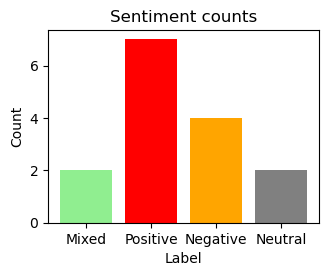

In [12]:
try:
    import matplotlib.pyplot as plt
    labels = list(totals.keys())
    values = [totals[k] for k in labels]
    colors = ["lightgreen", "red", "orange", "grey"]
    plt.figure(figsize=(3.5, 2.5))
    plt.bar(labels, values, color=colors)
    plt.title('Sentiment counts')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()
except Exception as e:
    print('Chart skipped or totals not ready yet:', e)

---
### Checklist to Submit
- [X] Filled POS/NEG keywords
- [X] Implemented `map_post`
- [X] Grouped mapped output into `groups`
- [X] Reduced to `totals`
- [X] Printed totals and verdict
- [X] (Optional) Chart
